# Setup and Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv("Train_data.csv")
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


#### Target Variable Classes:

Respondents 65 years old and older were labeled as "Senior" and all individuals under 65 years old as "Adult".

• age_group: Adult - 0

• age_group: Senior - 1

#### Features:

The dataset contains the following features:

• SEQN: Sequence number (identifier)

• RIAGENDR: Respondent's Gender (1=Male, 2=Female)

• PAQ605: Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week

• BMXBMI: Body Mass Index

• LBXGLU: Glucose level

• DIQOIO: Diabetes questionnaire response

• LBXGLT: Glucose tolerance (Oral)

• LBXIN: Insulin level

In [3]:
df.columns = ['seqn', 'gender', 'phy_act', 'bmi', 'gluco_level', 'diabetes', 'gluco_toler', 'insulin', 'age_group']
df.head()

,seqn,gender,phy_act,bmi,gluco_level,diabetes,gluco_toler,insulin,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   seqn         1954 non-null   float64
 1   gender       1948 non-null   float64
 2   phy_act      1953 non-null   float64
 3   bmi          1948 non-null   float64
 4   gluco_level  1953 non-null   float64
 5   diabetes     1948 non-null   float64
 6   gluco_toler  1955 non-null   float64
 7   insulin      1957 non-null   float64
 8   age_group    1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


# Data Preprocessing

In [5]:
df.isna().sum()

seqn           12
gender         18
phy_act        13
bmi            18
gluco_level    13
diabetes       18
gluco_toler    11
insulin         9
age_group      14
dtype: int64

### Handling Missing Values

In [6]:
df = df.dropna(subset=['age_group'])

def fillmode(df):
    df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
    df['phy_act'] = df['phy_act'].fillna(df['phy_act'].mode()[0])
    df['diabetes'] = df['diabetes'].fillna(df['diabetes'].mode()[0])

fillmode(df)

#### Plotting Distribution of Continuous Variables

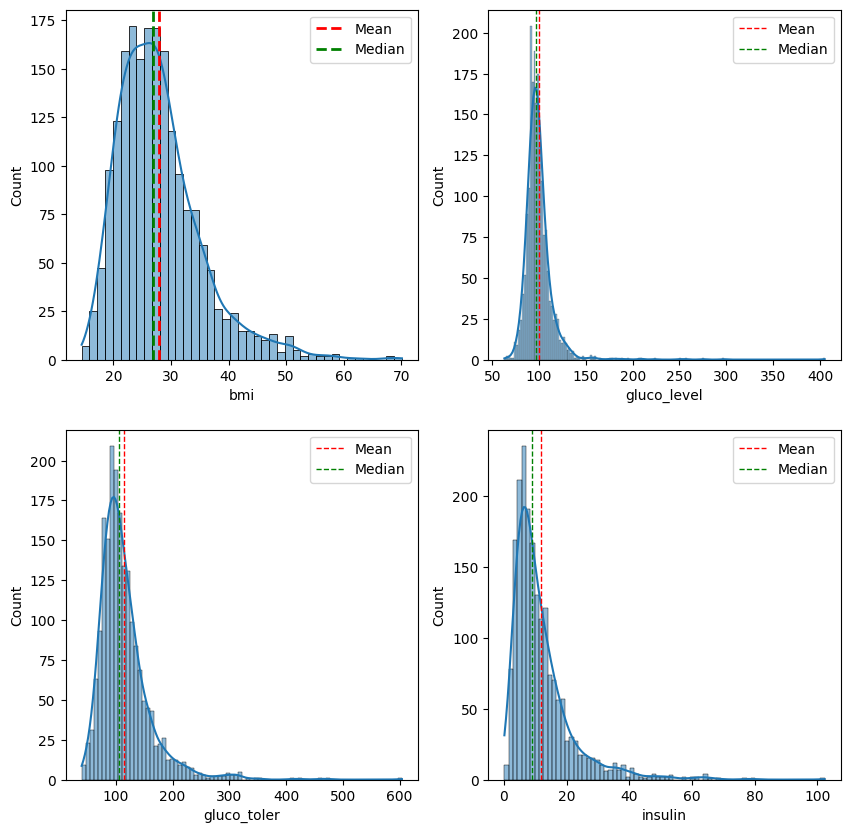

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(df['bmi'].dropna(), kde=True, ax=ax[0][0])
ax[0][0].axvline(df['bmi'].mean(), color='r', linestyle='--', linewidth=2, label='Mean')
ax[0][0].axvline(df['bmi'].median(), color='g', linestyle='--', linewidth=2, label='Median')
ax[0][0].legend()

sns.histplot(df['gluco_level'].dropna(), kde=True, ax=ax[0][1]) 
ax[0][1].axvline(df['gluco_level'].mean(), color='r', linestyle='--', linewidth=1, label='Mean')
ax[0][1].axvline(df['gluco_level'].median(), color='g', linestyle='--', linewidth=1, label='Median')
ax[0][1].legend()

sns.histplot(df['gluco_toler'].dropna(), kde=True, ax=ax[1][0]) 
ax[1][0].axvline(df['gluco_toler'].mean(), color='r', linestyle='--', linewidth=1, label='Mean')
ax[1][0].axvline(df['gluco_toler'].median(), color='g', linestyle='--', linewidth=1, label='Median')
ax[1][0].legend()

sns.histplot(df['insulin'].dropna(), kde=True, ax=ax[1][1]) 
ax[1][1].axvline(df['insulin'].mean(), color='r', linestyle='--', linewidth=1, label='Mean')
ax[1][1].axvline(df['insulin'].median(), color='g', linestyle='--', linewidth=1, label='Median')
ax[1][1].legend()

plt.show()

In [8]:
def fillmedian(df):
    df['bmi'] = df['bmi'].fillna(df['bmi'].median())
    df['gluco_level'] = df['gluco_level'].fillna(df['gluco_level'].median())
    df['gluco_toler'] = df['gluco_toler'].fillna(df['gluco_toler'].median())
    df['insulin'] = df['insulin'].fillna(df['insulin'].median())

fillmedian(df)

df.isna().sum()

seqn           12
gender          0
phy_act         0
bmi             0
gluco_level     0
diabetes        0
gluco_toler     0
insulin         0
age_group       0
dtype: int64

In [9]:
df = df.drop('seqn', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 0 to 1965
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       1952 non-null   float64
 1   phy_act      1952 non-null   float64
 2   bmi          1952 non-null   float64
 3   gluco_level  1952 non-null   float64
 4   diabetes     1952 non-null   float64
 5   gluco_toler  1952 non-null   float64
 6   insulin      1952 non-null   float64
 7   age_group    1952 non-null   object 
dtypes: float64(7), object(1)
memory usage: 137.2+ KB


### Encoding age_group

In [11]:
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

In [12]:
df.head()

,gender,phy_act,bmi,gluco_level,diabetes,gluco_toler,insulin,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0
3,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0


# Applying Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
X = df.drop('age_group', axis=1)
y = df['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55, stratify=y)

In [15]:
model = LogisticRegression(solver='liblinear', class_weight='balanced')  # 'liblinear' is good for small datasets
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = model.predict(X_test)         # class predictions (0 or 1)
y_proba = model.predict_proba(X_test)  # probability predictions (optional)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7135549872122762
Confusion Matrix:
 [[244  84]
 [ 28  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       328
           1       0.29      0.56      0.38        63

    accuracy                           0.71       391
   macro avg       0.60      0.65      0.60       391
weighted avg       0.80      0.71      0.74       391



In [18]:
sub = pd.read_csv('Test_Data.csv')
sub.columns = ['seqn', 'gender', 'phy_act', 'bmi', 'gluco_level', 'diabetes', 'gluco_toler', 'insulin']

sub.isna().sum()

seqn           2
gender         2
phy_act        1
bmi            1
gluco_level    1
diabetes       1
gluco_toler    2
insulin        1
dtype: int64

In [19]:
fillmode(sub)
fillmedian(sub)

In [21]:
pd.DataFrame(model.predict(sub.drop('seqn', axis = 1))).to_csv('submission.csv', index=False)